In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

4 District Command (in charge of 4 District Police Station in Vaughan) is looking to understand
projected calls for service trends in their District and the impacts on front line staffing.
Your submission for this problem must include:

b) A forecast of future scheduling challenges for 4 District
- What days of the year might have the most officers off and do those days coincide
with days that have high call demands?
- Consider scheduling data provided for 4 District
- Consider calls for service demand in 4 District
- Consider historical crime in 4 District

In [6]:
staff_df = pd.read_excel("../data/4_District_Platoon_Staffing_Exceptions_2020_to_2022.xlsx")
staff_df.head()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type
0,4 District B Platoon,34260,20200227,07:00:00,12.0,Vacation
1,4 District B Platoon,34260,20200220,07:00:00,10.0,Training
2,4 District B Platoon,34260,20200219,07:00:00,10.0,Training
3,4 District B Platoon,34260,20200307,07:00:00,12.0,Sick
4,4 District B Platoon,34260,20200228,07:00:00,12.0,Vacation


In [7]:
staff_df['Exception Date'] = pd.to_datetime(staff_df['Exception Date'], format='%Y%m%d')
staff_df['year'] = staff_df['Exception Date'].dt.year.apply(str)
staff_df['month'] = staff_df['Exception Date'].dt.month.apply(str)
staff_df['day'] = staff_df['Exception Date'].dt.day.apply(str)

staff_df.head()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,2,27
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,2,20
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,2,19
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,3,7
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,2,28


In [8]:
staff_df.dtypes

Platoon                         object
Officer Badge #                  int64
Exception Date          datetime64[ns]
Exception Start Time            object
# of Hours                     float64
Exception Type                  object
year                            object
month                           object
day                             object
dtype: object

In [9]:
day_group = staff_df.groupby('day').count().reset_index()[['day', 'Platoon']]
day_group = day_group.rename(columns={'Platoon': 'absence_count'})
day_group.head()

,day,absence_count
0,1,959
1,10,897
2,11,866
3,12,911
4,13,928


In [10]:
top_absence = day_group.sort_values(by='absence_count',
                                    ascending=False)

top_absence = top_absence.reset_index().copy()

print(top_absence.iloc[:10])

   index day  absence_count
0     28   7            987
1     13  21            977
2     14  22            971
3     12  20            969
4      6  15            963
5      7  16            963
6     20  28            960
7      0   1            959
8      8  17            956
9      5  14            943


## Which dates are there the most amount of absences in each year?

In [11]:
date_group = staff_df.groupby('Exception Date').count().reset_index()[['Exception Date','Platoon']]
date_group = date_group.rename(columns={'Platoon': 'absence_count'})
date_group['year'] = date_group['Exception Date'].dt.year.apply(str)

for year in ['2020','2021', '2022']:
    
    top_absence = date_group[
        date_group['year']==year
    ].sort_values(by='absence_count',ascending=False)
    
    top_absence = top_absence.reset_index().copy()
    
    print(top_absence.iloc[:10])
    print()

   index Exception Date  absence_count  year
0    300     2020-10-27             47  2020
1    286     2020-10-13             47  2020
2    287     2020-10-14             43  2020
3    299     2020-10-26             42  2020
4    273     2020-09-30             42  2020
5    282     2020-10-09             42  2020
6    301     2020-10-28             41  2020
7    180     2020-06-29             40  2020
8    210     2020-07-29             40  2020
9    307     2020-11-03             40  2020

   index Exception Date  absence_count  year
0    730     2021-12-31             56  2021
1    667     2021-10-29             51  2021
2    657     2021-10-19             47  2021
3    722     2021-12-23             45  2021
4    666     2021-10-28             45  2021
5    724     2021-12-25             44  2021
6    629     2021-09-21             43  2021
7    630     2021-09-22             43  2021
8    632     2021-09-24             43  2021
9    725     2021-12-26             42  2021

   index

### End

In [12]:
year_day_type_group = staff_df.groupby(['Exception Date', 'Exception Type']).count().reset_index()[['Exception Date', 'Exception Type', 'Platoon',]]
year_day_type_group = year_day_type_group.rename(columns={'Platoon': 'absence_count'})
year_day_type_group

,Exception Date,Exception Type,absence_count
0,2020-01-01,Sick,2
1,2020-01-01,Vacation,24
2,2020-01-02,Sick,2
3,2020-01-02,Training,3
4,2020-01-02,Vacation,13
...,...,...,...
2874,2022-12-29,Vacation,23
2875,2022-12-30,Sick,8
2876,2022-12-30,Vacation,27
2877,2022-12-31,Sick,1


In [13]:
absence_pivot = year_day_type_group.pivot_table(values='absence_count', index='Exception Date', columns='Exception Type', aggfunc='sum')
absence_pivot['Training'] = absence_pivot['Training'].fillna(0)
absence_pivot

Exception Type,Sick,Training,Vacation
Exception Date,,,
2020-01-01,2.0,0.0,24.0
2020-01-02,2.0,3.0,13.0
2020-01-03,4.0,3.0,12.0
2020-01-04,1.0,2.0,7.0
2020-01-05,4.0,2.0,10.0
...,...,...,...
2022-12-27,4.0,0.0,23.0
2022-12-28,5.0,0.0,22.0
2022-12-29,9.0,0.0,23.0


<Figure size 700x500 with 0 Axes>

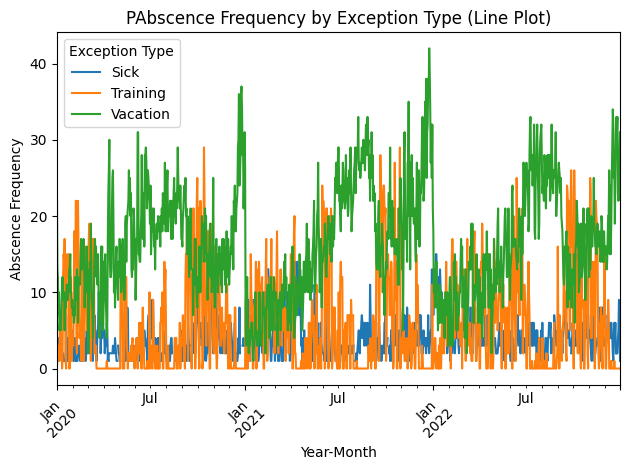

In [14]:
# Line plot
plt.figure(figsize=(7, 5))
absence_pivot.plot(kind='line')
plt.title('PAbscence Frequency by Exception Type (Line Plot)')
plt.xlabel('Year-Month')
plt.ylabel('Abscence Frequency')
plt.legend(title='Exception Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
pd.set_option('display.max_rows', 800)
year_day_type_group[
    (year_day_type_group['Exception Type']=='Training')]

,Exception Date,Exception Type,absence_count
3,2020-01-02,Training,3
6,2020-01-03,Training,3
9,2020-01-04,Training,2
12,2020-01-05,Training,2
15,2020-01-06,Training,1
18,2020-01-07,Training,7
21,2020-01-08,Training,5
24,2020-01-09,Training,3
27,2020-01-10,Training,3
32,2020-01-12,Training,1


In [16]:
staff_df['Platoon'].unique()

array(['4 District B Platoon', '4 District D Platoon',
       '4 District C Platoon', '4 District A Platoon'], dtype=object)

In [17]:
staff_df['day'] = staff_df['day'].apply(lambda x: f'0{x}'if len(str(x)) ==1 else x)
staff_df['month'] = staff_df['Exception Date'].dt.month_name().apply(lambda x: x[:3])
staff_df['month_day'] = staff_df['month'] + '-' + staff_df['day']
staff_df.head()

,Platoon,Officer Badge #,Exception Date,Exception Start Time,# of Hours,Exception Type,year,month,day,month_day
0,4 District B Platoon,34260,2020-02-27,07:00:00,12.0,Vacation,2020,Feb,27,Feb-27
1,4 District B Platoon,34260,2020-02-20,07:00:00,10.0,Training,2020,Feb,20,Feb-20
2,4 District B Platoon,34260,2020-02-19,07:00:00,10.0,Training,2020,Feb,19,Feb-19
3,4 District B Platoon,34260,2020-03-07,07:00:00,12.0,Sick,2020,Mar,07,Mar-07
4,4 District B Platoon,34260,2020-02-28,07:00:00,12.0,Vacation,2020,Feb,28,Feb-28


# Day

In [18]:
df_2022 = staff_df.copy()
date_count = df_2022['month_day'].value_counts().reset_index()
date_count['count']=date_count['count']/3
date_count = date_count.sort_values(by='count', ascending = False)
date_count.set_index('month_day', inplace=True)

temp_df = date_count.reset_index()
temp_df[
    temp_df['month_day'] == 'May-21'
]

,month_day,count
145,May-21,27.666667


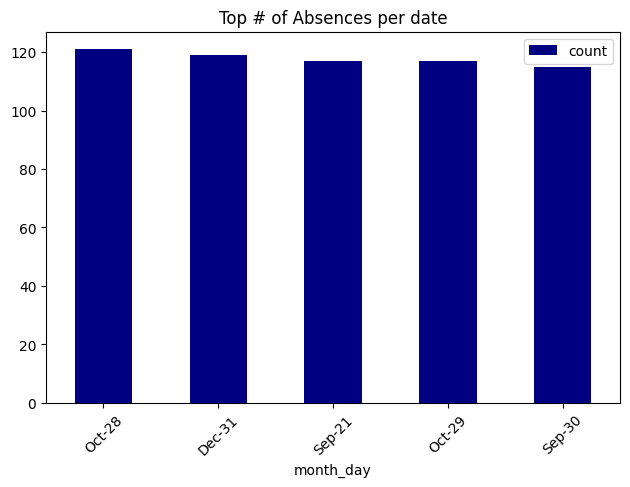

In [44]:
df_2022 = staff_df.copy()
date_count = df_2022['month_day'].value_counts().reset_index()

date_count = date_count.sort_values(by='count', ascending = False)
date_count.set_index('month_day', inplace=True)
date_count = date_count.head(5)


date_count.plot(kind='bar', color='navy')
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('Top # of Absences per date')
plt.show()

In [ ]:
date_count

In [33]:
top_5_dates = staff_df[
    (staff_df['month_day'] =='Dec-31') |
    (staff_df['month_day'] =='Oct-28') |
    (staff_df['month_day'] =='Sep-21')
    ]
round(top_5_dates['Exception Type'].value_counts() / top_5_dates.shape[0],2)

Exception Type
Vacation    0.52
Training    0.34
Sick        0.14
Name: count, dtype: float64

<Axes: >

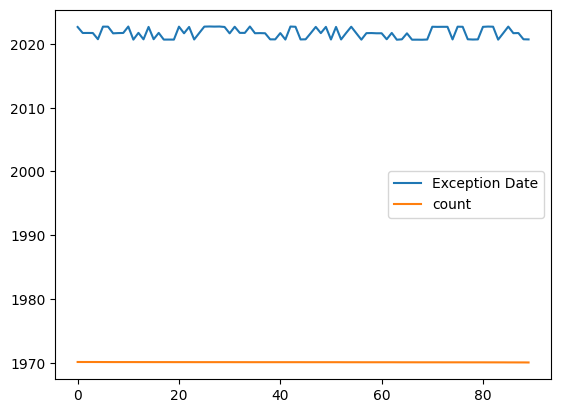

In [40]:
staff_df[
    staff_df['month'] == 'Sep'
]['Exception Date'].value_counts().reset_index().plot(kind='line')

# Month

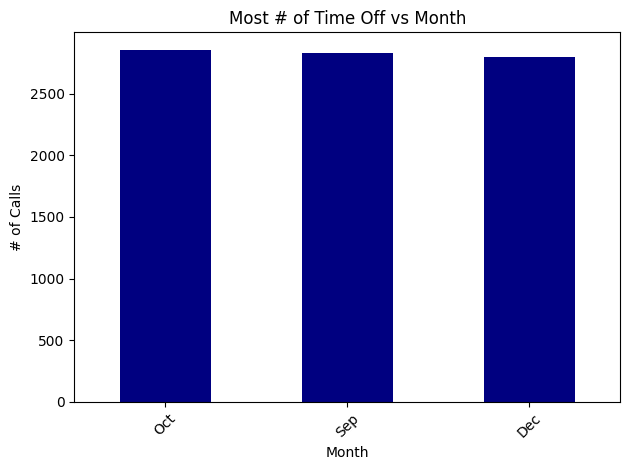

In [46]:
top_3_months = staff_df['month'].value_counts().head(3)
top_3_months.plot(kind='bar', color='navy')
plt.xticks(rotation=45)
plt.title('Most # of Time Off vs Month')
plt.xlabel("Month")
plt.ylabel("# of Calls")
plt.tight_layout()
plt.show()

In [27]:
top_3_months = staff_df[
    (staff_df['month'] =='Oct') |
    (staff_df['month'] =='Sep') |
    (staff_df['month'] =='Dec')
    ]
round(top_3_months['Exception Type'].value_counts().head() / top_3_months.shape[0],2)

Exception Type
Vacation    0.63
Training    0.25
Sick        0.13
Name: count, dtype: float64

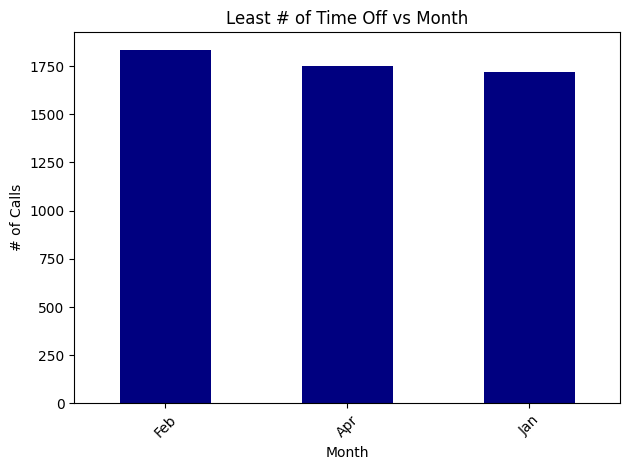

In [29]:
bottom_3_months = staff_df['month'].value_counts().tail(3)
bottom_3_months.plot(kind='bar', color='navy')
plt.xticks(rotation=45)
plt.title('Least # of Time Off vs Month')
plt.xlabel("Month")
plt.ylabel("# of Calls")
plt.tight_layout()
plt.show()

In [30]:
bottom_3_months = staff_df[
    (staff_df['month'] =='Oct') |
    (staff_df['month'] =='Sep') |
    (staff_df['month'] =='Dec')
    ]
round(bottom_3_months['Exception Type'].value_counts().head() / bottom_3_months.shape[0],2)

Exception Type
Vacation    0.63
Training    0.25
Sick        0.13
Name: count, dtype: float64

0        07:00:00
1        07:00:00
2        07:00:00
3        07:00:00
4        07:00:00
           ...   
28369    18:00:00
28370    07:00:00
28371    07:00:00
28372    19:00:00
28373    07:00:00
Name: Exception Start Time, Length: 28374, dtype: object

In [134]:
staff_df['Exception Start Time'] = staff_df['Exception Start Time'].apply(str)
staff_df['hour'] = staff_df['Exception Start Time'].apply(lambda x: x[:2])
staff_df['hour'].head()

0    07
1    07
2    07
3    07
4    07
Name: hour, dtype: object

<Axes: xlabel='hour'>

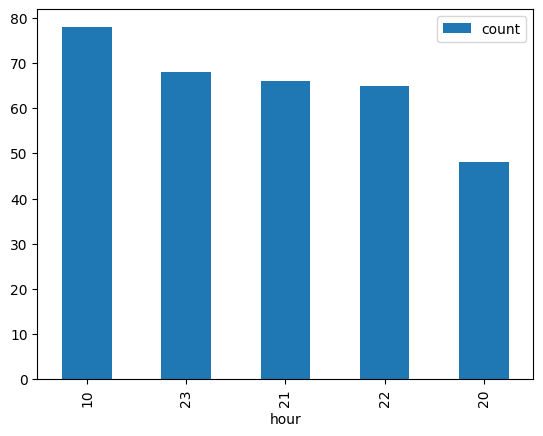

In [144]:
time = staff_df['hour'].value_counts().reset_index().sort_values('count',ascending=False)
time.set_index('hour', inplace=True)
time.tail(5).plot(kind='bar')

# Save cleaned Data

In [147]:
staff_df.to_csv('data/clean_staff_df.csv', index=False)